In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Lets assume a sample DTM with 10 documents
#containing 2 terms after cleaning
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91]])

In [3]:
DTM = pd.DataFrame(X,columns=['t1','t2'])
DTM

,t1,t2
0,5,3
1,10,15
2,15,12
3,24,10
4,30,30
5,85,70
6,71,80
7,60,78
8,70,55
9,80,91


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

In [5]:
np.hstack((X,y_kmeans.reshape(-1,1)))

array([[ 5,  3,  0],
       [10, 15,  0],
       [15, 12,  0],
       [24, 10,  0],
       [30, 30,  0],
       [85, 70,  1],
       [71, 80,  2],
       [60, 78,  2],
       [70, 55,  1],
       [80, 91,  2]])

In [6]:
kmeans.cluster_centers_

array([[16.8       , 14.        ],
       [77.5       , 62.5       ],
       [70.33333333, 83.        ]])

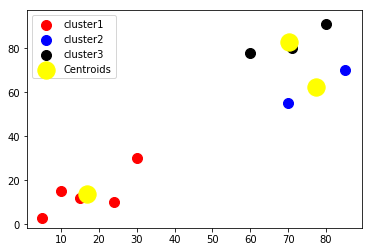

In [7]:
# Visualising the clusters

#Plot all the data points belonging to cluster 0
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],
            s=100,c='red',label='cluster1')
#Plot all the data points belonging to cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,
            c='blue',label='cluster2')
#Plot all the data points belonging to cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,
            c='black',label='cluster3')
#Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],s=300,c='yellow',
            label='Centroids')
plt.legend()
plt.show()

# To get the the right value of k, the number of clusters

In [8]:
wcss = [] #to store the value of within sum of Squares or within cluster sum of squares
for i in range(1,11):
      #k-means++ Pick k-points in the dataset in random as the centeroid at the start of the algorithm
      #This will result in the fewer number of iterations for centeroids to become static
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #intertia_ gives the WCSS value

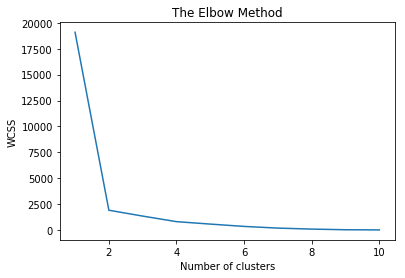

In [9]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2,random_state=0) 
labels = kmeans.fit_predict(X)

In [11]:
print(labels)  

[0 0 0 0 0 1 1 1 1 1]


In [12]:
kmeans.cluster_centers_

array([[16.8, 14. ],
       [73.2, 74.8]])

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_score(X,labels,random_state=200)

0.7485057741241999

In [15]:
DTM['cluster'] = labels
DTM

,t1,t2,cluster
0,5,3,0
1,10,15,0
2,15,12,0
3,24,10,0
4,30,30,0
5,85,70,1
6,71,80,1
7,60,78,1
8,70,55,1
9,80,91,1


In [16]:
print(labels)  

[0 0 0 0 0 1 1 1 1 1]


In [17]:
kmeans.cluster_centers_

array([[16.8, 14. ],
       [73.2, 74.8]])

# inference
- From Cluster centers we will be able to infer the dominating term in that cluster, here we have 2 clusters :
    1. The first cluster is at co-ordinate (16.8,14.0)
    2. the second cluster is at co-ordinate (73.2,74.8)
- These co-ordinates here are for our features, which are terms in our corpus and their frequncies
- These center values are the mean of the frequencies of the respective terms in a particular cluster
Eg: in the second cluster
    - 73.2 is the mean of all the term-1 frequencies 
    - 74.8 is the mean of all the term-2 frequencies
    
- Since mean of term-1 > mean of term-2 in cluster 1 we conclude that t1 is dominating in terms of its frequency count in cluster 1 and similarly in cluster 2-> t2 is dominating

In [34]:
BOW = list(DTM.columns)
num_clusters=2

In [35]:
print("Top  term per cluster:")
#Get the index of the cluster centers in reverse order for every cluster
#Step:1
order_centroids_arg = kmeans.cluster_centers_.argsort()[:,::-1]
#Step:2:
for i in range(num_clusters):
    print ("Cluster :",  i)
    for ind in order_centroids_arg[i, : 1]:
        #To get the dominating term per cluster
        print (BOW[ind])

Top  term per cluster:
Cluster : 0
t1
Cluster : 1
t2


In [18]:
#Get the index of the cluster centers in reverse order
kmeans.cluster_centers_.argsort()[:,::-1]

array([[0, 1],
       [1, 0]], dtype=int64)

In [ ]:
#Implementing Hierarchical(Agglomerative clustering) with cosine distances

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
cs = cosine_similarity(X)
cs.shape

(10, 10)

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z=linkage(cs,method="average")

Text(0, 0.5, 'Distance')

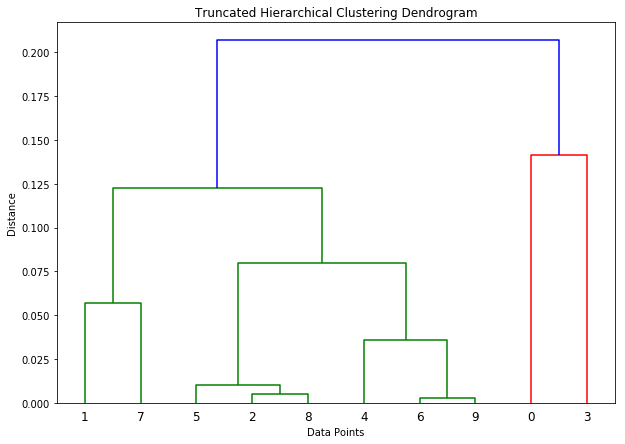

In [22]:
plt.figure(figsize=(10, 7))  
dendrogram(Z)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage = 'average')  
cluster_labels = cluster.fit_predict(cs)
cluster_labels

array([3, 0, 2, 1, 0, 2, 0, 0, 2, 0], dtype=int64)

In [51]:
silhouette_score(cs,cluster_labels,metric = 'cosine', random_state=0)

0.5843187861341308

In [41]:
DTM['cluster'] = cluster_labels

In [42]:
DTM

,t1,t2,cluster
0,5,3,3
1,10,15,0
2,15,12,2
3,24,10,1
4,30,30,0
5,85,70,2
6,71,80,0
7,60,78,0
8,70,55,2
9,80,91,0
